<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Human_Activity_Recognition_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import callbacks
#callbacks.ModelCheckPoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

--2023-11-20 12:56:32--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: ‘UCI-HAR.zip’

UCI-HAR.zip         100%[===================>]  58.17M  73.5MB/s    in 0.8s    

2023-11-20 12:56:33 (73.5 MB/s) - ‘UCI-HAR.zip’ saved [60999314/60999314]



In [3]:
!unzip -nq UCI-HAR.zip

In [4]:
!ls

 __MACOSX   sample_data  'UCI HAR Dataset'   UCI-HAR.zip


In [5]:
!ls 'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [6]:
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [7]:
!head 'UCI HAR Dataset/train/X_train.txt'

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [8]:
!head 'UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


In [9]:
!ls 'UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


In [10]:
!ls 'UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt


In [11]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt'

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

In [12]:
#Since the data is separated by a white space - delim_whitespace = True
#Since this dataset dont have header - header = None
df = pd.read_csv(
    'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
    header = None,
    delim_whitespace = True
)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


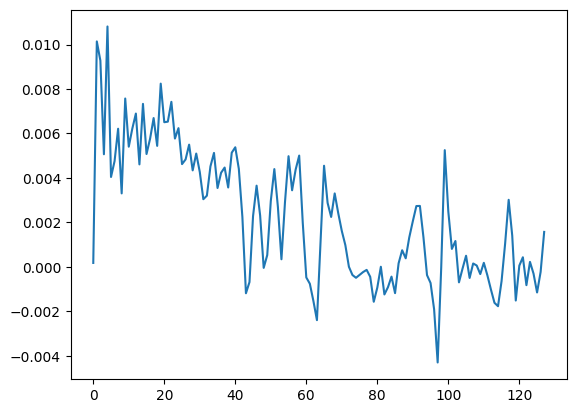

In [15]:
df.iloc[0].plot();

In [16]:
#Obtain these by inspecting the files
T = 128
NTrain = 7352
NTest = 2947
D = 9 #Since there are 9 files
K = 6 #number of classes (1-6)

In [31]:
def load_data():
  XTrain = np.zeros((NTrain,T,D))
  XTest = np.zeros((NTest,T,D))

  #Train Data
  ts_filenames = [
    'body_acc_x_train.txt',  'body_gyro_x_train.txt',  'total_acc_x_train.txt',
    'body_acc_y_train.txt',  'body_gyro_y_train.txt',  'total_acc_y_train.txt',
    'body_acc_z_train.txt',  'body_gyro_z_train.txt',  'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d,fn in enumerate(ts_filenames):
    df = pd.read_csv(
    f'{ts_file_prefix}Inertial Signals/{fn}',
    header = None,
    delim_whitespace = True
  )

    #NTrain x T array
    x = df.to_numpy()
    XTrain[:,:,d] = x

  YTrain = pd.read_csv(
    f'{ts_file_prefix}y_train.txt',header = None).to_numpy() - 1
  YTrain = YTrain.flatten()

  #Test Data
  ts_filenames = [
      'body_acc_x_test.txt',  'body_gyro_x_test.txt',  'total_acc_x_test.txt',
      'body_acc_y_test.txt',  'body_gyro_y_test.txt',  'total_acc_y_test.txt',
      'body_acc_z_test.txt',  'body_gyro_z_test.txt',  'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d,fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header = None,
        delim_whitespace = True
    )

    #NTrain x T array
    x = df.to_numpy()
    XTest[:,:,d] = x

  # test labels
  YTest = pd.read_csv(
      f'{ts_file_prefix}y_test.txt',header = None
  ).to_numpy() - 1

  YTest = YTest.flatten()

  return XTrain,YTrain,XTest,YTest


In [32]:
XTrain,YTrain,XTest,YTest = load_data()

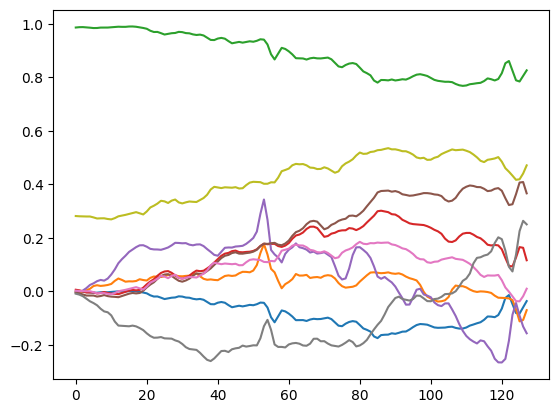

In [33]:
 #Plot all d = 9 time series of length T = 128
plt.plot(XTrain[7000, :, :]);

In [35]:
#ANN
inputs = []
features = []

#Make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32,activation='relu')(i)
  x = Dense(16,activation='relu')(x)
  inputs.append(i)
  features.append(x)

#Output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features)
x = Dense(K)(x)
model = Model(inputs,x)

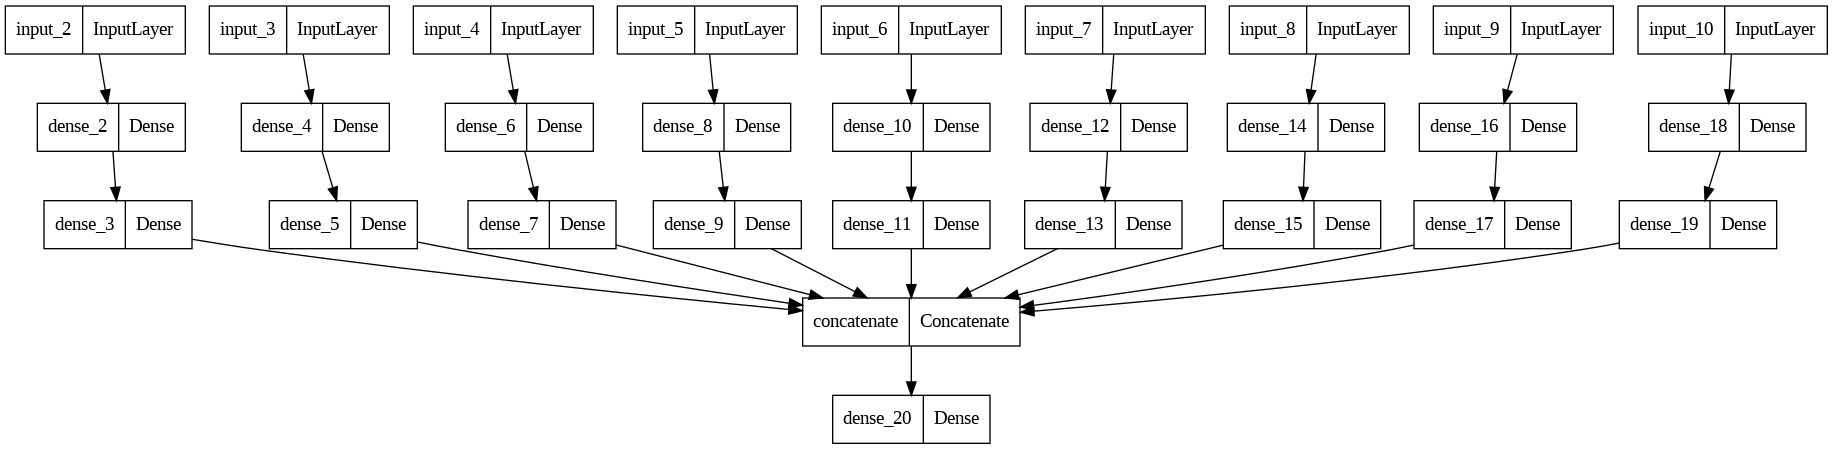

In [36]:
tf.keras.utils.plot_model(model)

In [40]:
from keras.callbacks import ModelCheckpoint
check_point = ModelCheckpoint(
    'best_model.h5',monitor = 'val_accuracy',save_best_only = True
)

In [42]:
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [45]:
XTrain_split = []
XTest_split = []
for d in range(D):
  XTrain_split.append(XTrain[:,:,d])
  XTest_split.append(XTest[:,:,d])

In [46]:
r = model.fit(
    XTrain_split,
    YTrain,
    epochs = 15,
    callbacks = [check_point],
    validation_data = (XTest_split,YTest)
)

Epoch 1/15
230/230 [==============================] - 7s 13ms/step - loss: 0.6793 - accuracy: 0.7599 - val_loss: 0.4828 - val_accuracy: 0.8368
Epoch 2/15
  7/230 [..............................] - ETA: 1s - loss: 0.2716 - accuracy: 0.9196

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 3s 12ms/step - loss: 0.2367 - accuracy: 0.9185 - val_loss: 0.3828 - val_accuracy: 0.8568
Epoch 3/15
230/230 [==============================] - 2s 7ms/step - loss: 0.1686 - accuracy: 0.9404 - val_loss: 0.3424 - val_accuracy: 0.8775
Epoch 4/15
230/230 [==============================] - 2s 7ms/step - loss: 0.1392 - accuracy: 0.9479 - val_loss: 0.3152 - val_accuracy: 0.8955
Epoch 5/15
230/230 [==============================] - 2s 7ms/step - loss: 0.1209 - accuracy: 0.9572 - val_loss: 0.2721 - val_accuracy: 0.8996
Epoch 6/15
230/230 [==============================] - 1s 6ms/step - loss: 0.1083 - accuracy: 0.9611 - val_loss: 0.2750 - val_accuracy: 0.8958
Epoch 7/15
230/230 [==============================] - 2s 7ms/step - loss: 0.1003 - accuracy: 0.9649 - val_loss: 0.2719 - val_accuracy: 0.9067
Epoch 8/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0966 - accuracy: 0.9652 - val_loss: 0.2534 - val_accuracy: 0.9108
Epoch 9/15
230/2

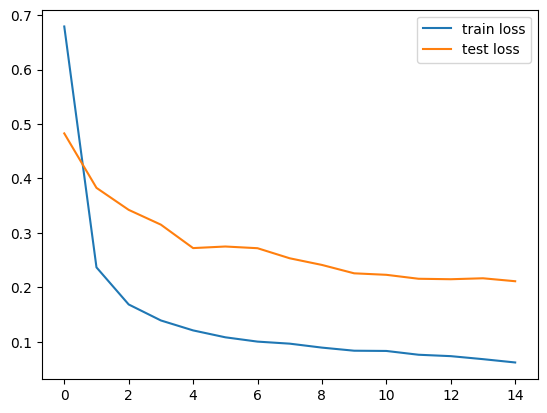

In [47]:
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'test loss')
plt.legend()

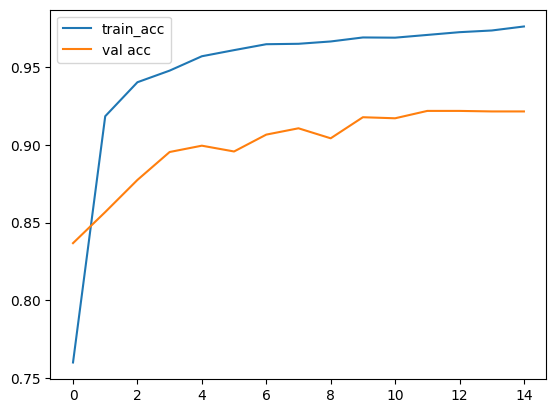

In [49]:
plt.plot(r.history['accuracy'],label = 'train_acc')
plt.plot(r.history['val_accuracy'],label = 'val acc')
plt.legend();

In [50]:
#Load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [52]:
#Make predictions
PTest = best_model.predict(XTest_split)

93/93 [==============================] - 1s 3ms/step


In [53]:
#True ANS = 1,Wrong ANS = 0
#Get the mean to calculate accuracy
np.mean(np.argmax(PTest,axis = 1) == YTest)

0.9219545300305395